In [1]:
import numpy as np
import matplotlib.pyplot as plt


#### Economic parameters

In [2]:
α = 1.0/3
β = 0.9
δ = 0.1
k_0 = 0.8

#### Defining the production function and marginal product of capital

In [3]:
def f(k):
  return k**α

def f_prime(k):
  return α*k**(α-1)

#### Defining dynamics of k(t) and c(t)

In [4]:
def dynamics(T, c_0): #T: time horizon
    c = np.zeros(T)
    k = np.zeros(T)
    k[0] = k_0
    c[0] = c_0
    for i in range(T - 1):
        k[i + 1] = f(k[i])  + (1 - δ) * k[i] - c[i]
        c[i + 1] =  β* c[i] *(f_prime(k[i + 1]) + 1 - δ)
    return k, c

# Plotting the results

In [5]:
c_0_range = np.array([0.3, 0.4, 0.5,0.64])

In [10]:
fontsize= 14
ticksize = 14
figsize = (10,10)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

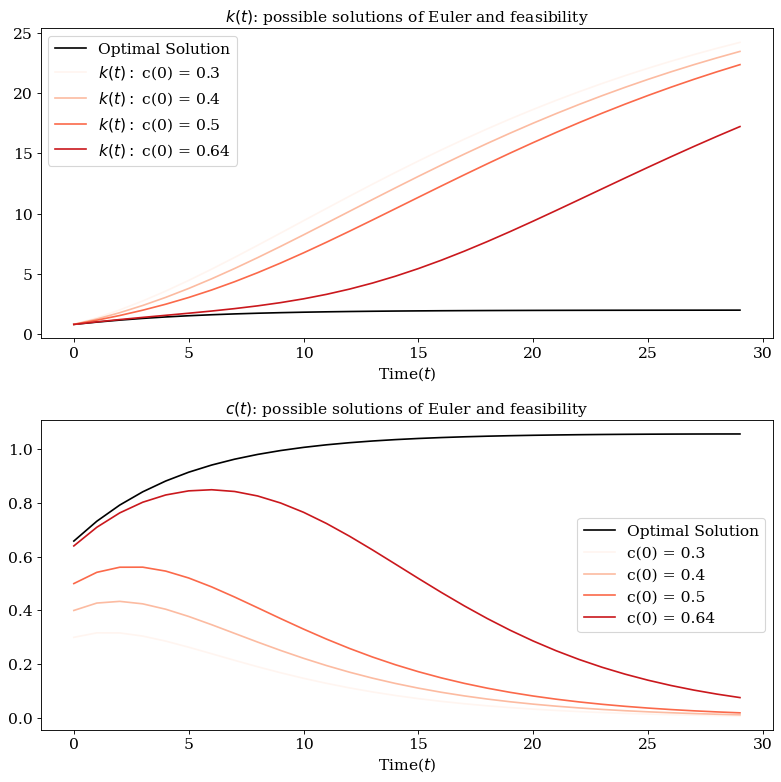

In [11]:
cmap = plt.cm.Reds
norm = plt.Normalize(vmin=0, vmax=len(c_0_range))

ax_capital = plt.subplot(211)
k_opt, c_opt = dynamics(T=30, c_0=0.658112)  # Optimal solution from shooting method
plt.plot(k_opt, color='k', label="Optimal Solution")

# Plot each solution with a different shade of red
for i, c_0 in enumerate(c_0_range):
    k, c = dynamics(30, c_0)
    ax_capital.plot(k, color=cmap(norm(i)), label="$k(t):$ "f'c(0) = {c_0}')  # Use a different shade of red for each curve

plt.title(r"$k(t)$: possible solutions of Euler and feasibility")
plt.xlabel(r"Time($t$)")
plt.legend()

ax_consumption = plt.subplot(212, sharex=ax_capital)
plt.plot(c_opt, color='k', label="Optimal Solution")

# Plot each consumption curve with the same shades of red
for i, c_0 in enumerate(c_0_range):
    k, c = dynamics(30, c_0)
    ax_consumption.plot(c, color=cmap(norm(i)), label=f'c(0) = {c_0}')  # Same shades of red for consumption
    plt.title(r"$c(t)$: possible solutions of Euler and feasibility")

plt.xlabel(r"Time($t$)")
plt.legend()
plt.tight_layout()
plt.savefig('TVC_violation.pdf')
